
___
# Probablity of Default model with Python

For this lecture we will be working with the credit risk dataset. This is prepared for the student's as a first step in credit risk ! 

We'll be trying to predict a classification- default or not default.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the credit risk data set

## Import Libraries
Let's import some libraries to get started!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by reading in the pd_dummy_dataset.csv file into a pandas dataframe.

In [4]:
df = pd.read_csv('pd_dataset.csv')

## Exercise 1 
Using the table PD_dataset, create the following samples to be used for creating the model:

1. ) Development sample: (70% obsevations)
2. ) Test sample: (remaining 30% obsevations)

Hint : sklearn.model_selection, train_test_split 

In [5]:
#load the function 
from sklearn.model_selection import train_test_split

#apply the function X is the explanatory variable, y target variable. 
X_train, X_test = train_test_split(df, test_size=0.30, 
                                                    random_state=101)

In [6]:
pd.set_option('display.max_columns', None)
X_train.reset_index(inplace=True)
X_train.head()

,index,CIF_Combo,into_default,snapshot_date,loan_purpose,balance_sum_eur,fx_rate,PD,EAD,Rating,Score,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,snapshot_year,balance_sum_loc
0,441,622704,0,31Jan2015,IN,80517.57,1.44978,0.021932,11955.76,MA14,593.0,E,C,E,G,B,A,E,C,2015,116732.76
1,22867,591224,0,31Aug2017,IN,26791.85,1.50731,0.000165,47330.92,MA02,715.0,C,A,B,M,A,B,E,D,2017,40383.62
2,25259,406766,0,31Dec2017,OO,162105.67,1.53215,0.000393,268750.05,MA03,675.0,E,A,A,L,C,B,E,E,2017,248370.21
3,16562,452346,0,30Nov2016,IN,68851.84,1.42229,0.003064,17036.00,MA10,641.0,E,A,A,G,C,B,E,C,2016,97927.28
4,5622,134283,0,31Aug2015,OO,45163.97,1.56881,0.041616,75173.42,MA15,585.0,C,E,E,K,C,A,E,E,2015,70853.69


## Univariate analysis 

## Exercise 2 
Perform an univariate analysis of all the variables involved (except for: PD, Rating, Score, snapshot_year, cif_combo, spapshot_date, into_default) in the development sample table created before, in order to determinate if all of them are candidates or if any adjustment it is needed, by obtaining the following:

- Number of observations
- Mean, std,
- Maximum, Minimum 
- Percentiles 25, 50, 75
- Number of missing and zero values
- Histogram of the variable 

Hint : describe, info, isna, hist

In [9]:
X_train.describe(include='all')

,index,CIF_Combo,into_default,snapshot_date,loan_purpose,balance_sum_eur,fx_rate,PD,EAD,Rating,Score,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,snapshot_year,balance_sum_loc
count,20354.000000,20354.000000,20354.00000,20354,20354,20354.000000,20354.000000,20354.000000,2.035400e+04,20354,20327.000000,20354,20354,20354,20354,20354,20354,20354,20354,20354.000000,2.035400e+04
unique,NaN,NaN,NaN,41,2,NaN,NaN,NaN,NaN,12,NaN,5,6,5,13,7,5,5,6,NaN,NaN
top,NaN,NaN,NaN,29Feb2016,OO,NaN,NaN,NaN,NaN,MA03,NaN,C,A,C,M,B,B,E,D,NaN,NaN
freq,NaN,NaN,NaN,558,10276,NaN,NaN,NaN,NaN,3679,NaN,10165,6854,6581,6770,5981,11877,11766,5011,NaN,NaN
mean,14552.879631,513603.603125,0.12204,NaN,NaN,100384.284990,1.490064,0.039325,1.000046e+05,NaN,638.687362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.203989,1.494685e+05
std,8405.073579,291029.143383,0.32734,NaN,NaN,87305.700168,0.056947,0.094765,8.092003e+04,NaN,54.030528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990175,1.302637e+05
min,1.000000,2352.000000,0.00000,NaN,NaN,0.000000,1.380400,0.000159,0.000000e+00,NaN,506.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,0.000000e+00
25%,7276.250000,256413.000000,0.00000,NaN,NaN,49418.282500,1.454790,0.000408,4.302385e+04,NaN,598.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,7.385517e+04
50%,14552.000000,522524.000000,0.00000,NaN,NaN,80690.705000,1.487980,0.003064,8.273334e+04,NaN,642.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,1.195454e+05
75%,21836.500000,771625.000000,0.00000,NaN,NaN,125691.632500,1.532150,0.021126,1.377256e+05,NaN,685.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.881072e+05


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20354 entries, 0 to 20353
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 20354 non-null  int64  
 1   CIF_Combo             20354 non-null  int64  
 2   into_default          20354 non-null  int64  
 3   snapshot_date         20354 non-null  object 
 4   loan_purpose          20354 non-null  object 
 5   balance_sum_eur       20354 non-null  float64
 6   fx_rate               20354 non-null  float64
 7   PD                    20354 non-null  float64
 8   EAD                   20354 non-null  float64
 9   Rating                20354 non-null  object 
 10  Score                 20327 non-null  float64
 11  Class_Chan_Ref_LoDoc  20354 non-null  object 
 12  Class_DTI             20354 non-null  object 
 13  Class_Initial_LTV     20354 non-null  object 
 14  Class_Pay_Ahead       20354 non-null  object 
 15  Class_Pay_Hist     

In [11]:
X_train.isna().sum()

index                    0
CIF_Combo                0
into_default             0
snapshot_date            0
loan_purpose             0
balance_sum_eur          0
fx_rate                  0
PD                       0
EAD                      0
Rating                   0
Score                   27
Class_Chan_Ref_LoDoc     0
Class_DTI                0
Class_Initial_LTV        0
Class_Pay_Ahead          0
Class_Pay_Hist           0
Class_Pay_Status         0
Class_Redraw_Change      0
Class_Repay_Stat         0
snapshot_year            0
balance_sum_loc          0
dtype: int64

In [12]:
for i in X_train.columns:
    column = X_train[i]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in columbn ', i, ' is : ', count)

Count of zeros in columbn  index  is :  0
Count of zeros in columbn  CIF_Combo  is :  0
Count of zeros in columbn  into_default  is :  17870
Count of zeros in columbn  snapshot_date  is :  0
Count of zeros in columbn  loan_purpose  is :  0
Count of zeros in columbn  balance_sum_eur  is :  397
Count of zeros in columbn  fx_rate  is :  0
Count of zeros in columbn  PD  is :  0
Count of zeros in columbn  EAD  is :  27
Count of zeros in columbn  Rating  is :  0
Count of zeros in columbn  Score  is :  0
Count of zeros in columbn  Class_Chan_Ref_LoDoc  is :  0
Count of zeros in columbn  Class_DTI  is :  0
Count of zeros in columbn  Class_Initial_LTV  is :  0
Count of zeros in columbn  Class_Pay_Ahead  is :  0
Count of zeros in columbn  Class_Pay_Hist  is :  0
Count of zeros in columbn  Class_Pay_Status  is :  0
Count of zeros in columbn  Class_Redraw_Change  is :  0
Count of zeros in columbn  Class_Repay_Stat  is :  0
Count of zeros in columbn  snapshot_year  is :  0
Count of zeros in columbn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe86efae700>,
      dtype=object)

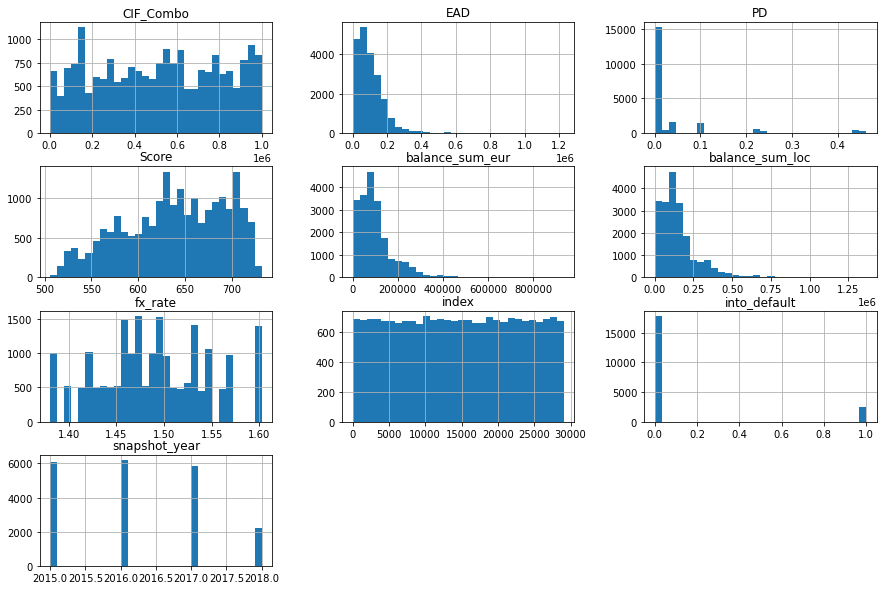

In [13]:
#select only numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = X_train.select_dtypes(include=numerics)

newdf.hist(bins=30, figsize=(15, 10))

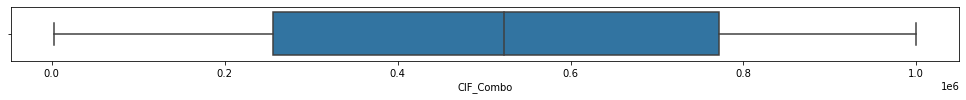

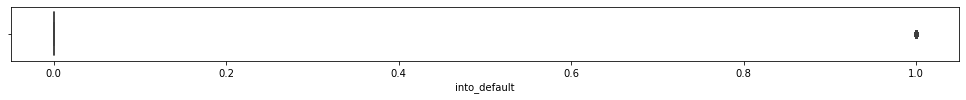

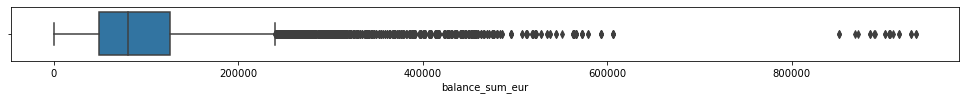

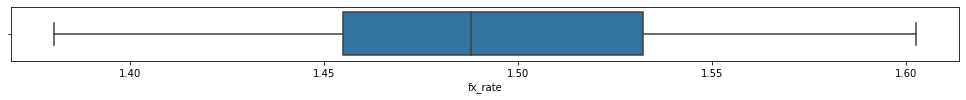

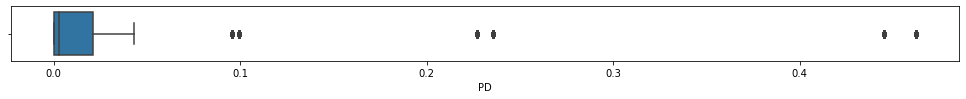

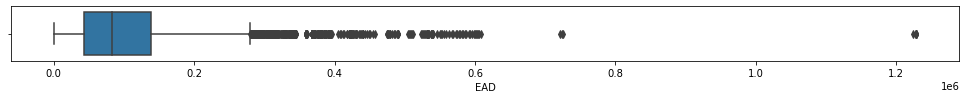

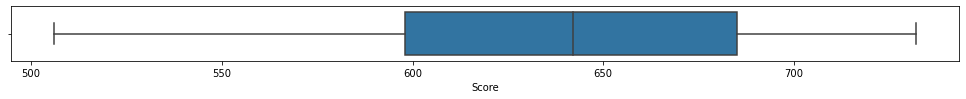

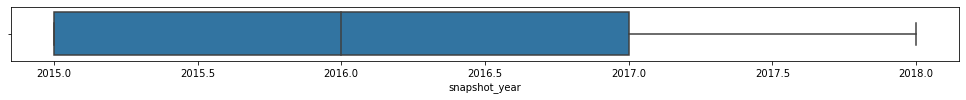

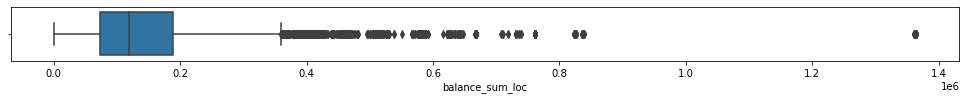

In [10]:
newdf=X_train.select_dtypes(exclude=['object'])
for column in newdf:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=newdf, x=column)

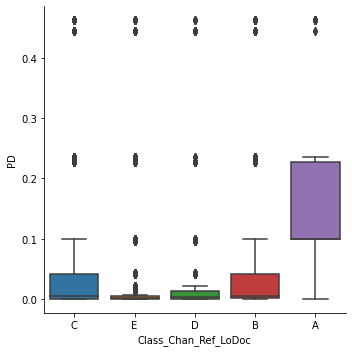

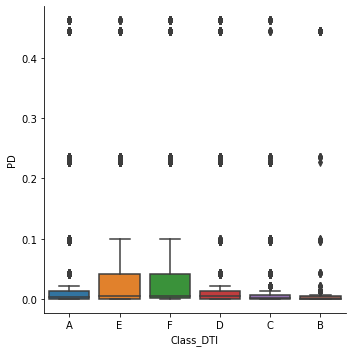

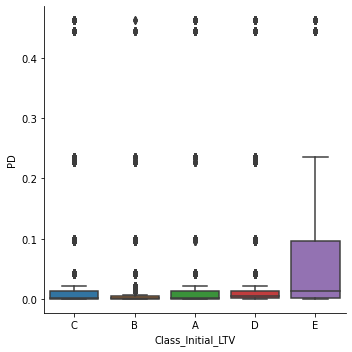

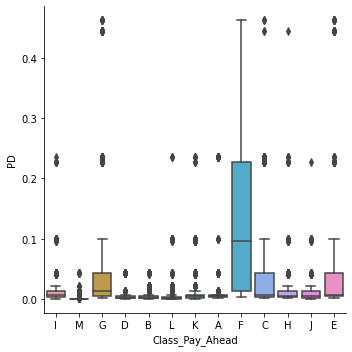

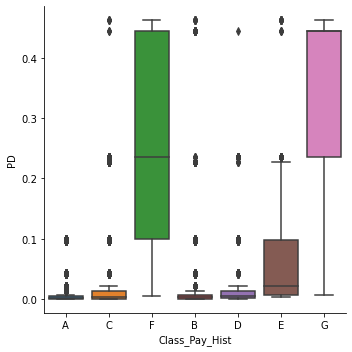

In [14]:
sns.catplot(data=df, x="Class_Chan_Ref_LoDoc", y="PD", kind="box")
sns.catplot(data=df, x="Class_DTI", y="PD", kind="box")
sns.catplot(data=df, x="Class_Initial_LTV", y="PD", kind="box")
sns.catplot(data=df, x="Class_Pay_Ahead", y="PD", kind="box")
sns.catplot(data=df, x="Class_Pay_Hist", y="PD", kind="box")

## Exercise 2 part 2 :
With the analysis obtained classify each variable into the following categories:

- Keep or delete

Hint : Which of the variable(s) should be kept or deleted - Business perspective and descriptive statistic

In [15]:
X_train.head()

,index,CIF_Combo,into_default,snapshot_date,loan_purpose,balance_sum_eur,fx_rate,PD,EAD,Rating,Score,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,snapshot_year,balance_sum_loc
0,441,622704,0,31Jan2015,IN,80517.57,1.44978,0.021932,11955.76,MA14,593.0,E,C,E,G,B,A,E,C,2015,116732.76
1,22867,591224,0,31Aug2017,IN,26791.85,1.50731,0.000165,47330.92,MA02,715.0,C,A,B,M,A,B,E,D,2017,40383.62
2,25259,406766,0,31Dec2017,OO,162105.67,1.53215,0.000393,268750.05,MA03,675.0,E,A,A,L,C,B,E,E,2017,248370.21
3,16562,452346,0,30Nov2016,IN,68851.84,1.42229,0.003064,17036.00,MA10,641.0,E,A,A,G,C,B,E,C,2016,97927.28
4,5622,134283,0,31Aug2015,OO,45163.97,1.56881,0.041616,75173.42,MA15,585.0,C,E,E,K,C,A,E,E,2015,70853.69


In [16]:
X_train = X_train.drop(columns=['EAD','CIF_Combo','snapshot_date','PD','Rating','Score','snapshot_year'])

In [17]:
len(X_train)

20354

# Exercise 3 - Part 1 

Using the development sample table perform the bivariate analysis of all the variables that pass the previous univariate analysis, obtaining the following:
- ROC value
- P value
- Beta 
- Standard error

Hint : OLS, roc_auc_score


In [34]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

newdf=X_train.select_dtypes(exclude=['object'])
df2 = pd.DataFrame()
for i in range(2,len(newdf.columns)):
    #define response variable
    y = newdf['into_default']
    
    #define explanatory variable
    x = newdf.iloc[:,i]
    
    #fit linear regression model
    model = sm.OLS(y, x).fit()
    
    #name
    df2.loc[i,'name'] =model.summary2().tables[1].index[0]
    
    #coef
    df2.loc[i,'coeff'] = round(model.summary2().tables[1].iloc[0,0],6)
    
    #std err
    df2.loc[i,'std_err'] = round(model.summary2().tables[1].iloc[0,1],6)
    
    #p value
    df2.loc[i,'p_value'] = round(model.summary2().tables[1].iloc[0,3],2)
    
    #auc value
    df2.loc[i,'auc'] = round(roc_auc_score(y, model.predict(newdf.iloc[:,i])),2)
df2

,name,coeff,std_err,p_value,auc
2,balance_sum_eur,0.000001,0.000000,0.0,0.59
3,fx_rate,0.081794,0.001539,0.0,0.50
4,balance_sum_loc,0.000001,0.000000,0.0,0.59


# Exercise 3 - Part 2

- __Graphic each one of the explanatory variables with the default:__
    * For the continuous variables, plot the information by deciles. (Hint : qcut, pointplot, groupby)
    * For discrete or categorical variables plot the entire information. (Hint : pointplot, groupby)
- __With the previous graphics, categorize the variables in order to create buckets with significant difference level of default with an adequate tendency.__ Hint: replace
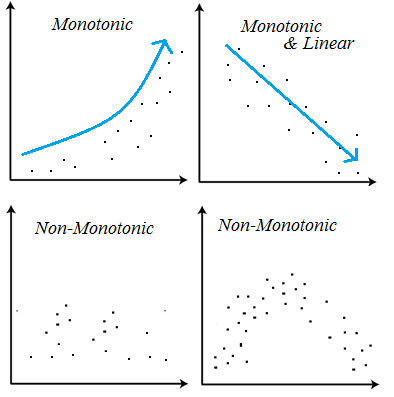
- __Create the WOE of the variable and their corresponding graphics.__
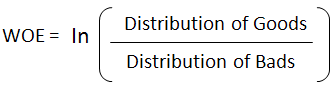

Hint : crosstab, 
```python
for i in range(len(X_train)):
    if X_train.loc[i,'loan_purpose'] == x['woe'].index[0]:
        X_train.loc[i,'loan_purpose_woe'] = x['woe'][0]
    elif X_train.loc[i,'loan_purpose'] == x['woe'].index[1]:
        X_train.loc[i,'loan_purpose_woe'] = x['woe'][1]
        
X_train['balance_sum_eur'] = np.where((X_train['balance_sum_eur'] < ______),'A',\
        np.where((X_train['balance_sum_eur'] > 60707) & (X_train['balance_sum_eur'] < ______), 'B', 'C'))
...
                                            
        ```

<ipython-input-35-c70b6c2305aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['default'] = X_train.into_default


0    0.495136
1    0.504864
Name: default, dtype: float64


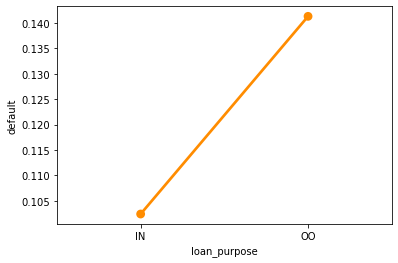

0    0.006190
1    0.219809
2    0.499410
3    0.084504
4    0.190085
Name: default, dtype: float64


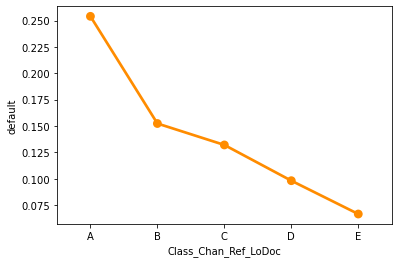

0    0.336740
1    0.036848
2    0.088042
3    0.159232
4    0.149799
5    0.229341
Name: default, dtype: float64


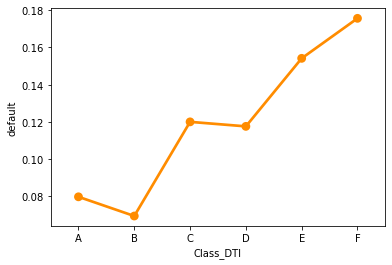

0    0.104058
1    0.135158
2    0.323327
3    0.241525
4    0.195932
Name: default, dtype: float64


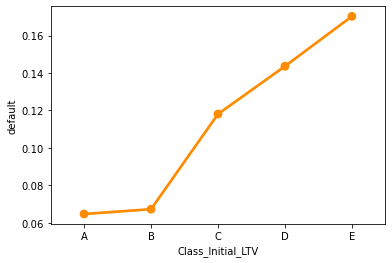

0     0.017294
1     0.090498
2     0.053749
3     0.016852
4     0.027611
5     0.208018
6     0.096689
7     0.023484
8     0.022747
9     0.018473
10    0.042842
11    0.049130
12    0.332613
Name: default, dtype: float64


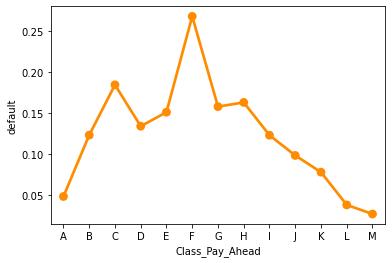

0    0.248944
1    0.293849
2    0.286823
3    0.041024
4    0.056205
5    0.063722
6    0.009433
Name: default, dtype: float64


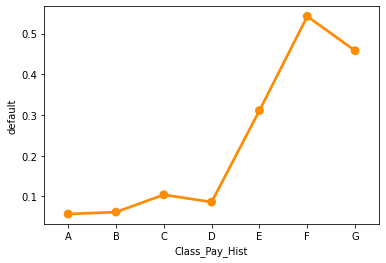

0    0.189103
1    0.583522
2    0.119731
3    0.080328
4    0.027316
Name: default, dtype: float64


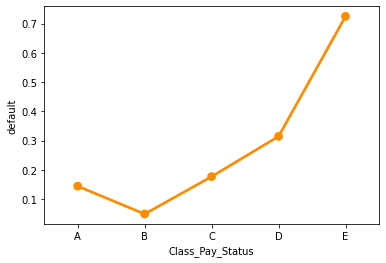

0    0.281615
1    0.048983
2    0.035570
3    0.055763
4    0.578068
Name: default, dtype: float64


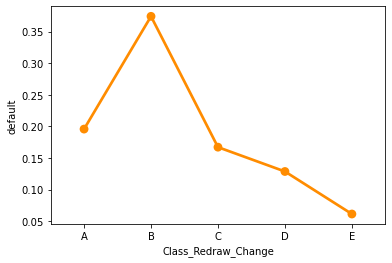

0    0.073892
1    0.028790
2    0.233861
3    0.246192
4    0.186253
5    0.231011
Name: default, dtype: float64


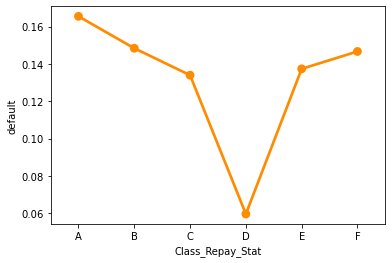

In [35]:
newdf=X_train.select_dtypes(include=['object'])
newdf['default'] = X_train.into_default
for i in list(newdf.iloc[:, 0:-1].columns):
    plt.figure()
    plot = newdf.groupby(i, as_index=False)['default'].mean()
    sns.pointplot(x=i,y='default',data=plot,color='darkorange')
    print(newdf.groupby(i, as_index=False)['default'].count().iloc[:,1]/len(newdf))
    plt.show()

In [36]:
X_train['Class_Chan_Ref_LoDoc'] = X_train.Class_Chan_Ref_LoDoc.replace('A' , 'AB')\
                                    .replace('B' , 'AB')\
                                    .replace('D' , 'DE')\
                                    .replace('E' , 'DE')
X_train['Class_DTI'] = X_train.Class_DTI.replace('A' , 'AB')\
                                    .replace('B' , 'AB')\
                                    .replace('C' , 'CDE')\
                                    .replace('D' , 'CDE')\
                                    .replace('E' , 'CDE')
X_train['Class_Initial_LTV'] = X_train.Class_Initial_LTV.replace('A' , 'AB')\
                                    .replace('B' , 'AB')

X_train['Class_Pay_Ahead'] = X_train.Class_Pay_Ahead.replace('A' , 'ABCDEFGH')\
                                    .replace('B' , 'ABCDEFGH')\
                                    .replace('C' , 'ABCDEFGH')\
                                    .replace('D' , 'ABCDEFGH')\
                                    .replace('E' , 'ABCDEFGH')\
                                    .replace('F' , 'ABCDEFGH')\
                                    .replace('G' , 'ABCDEFGH')\
                                    .replace('H' , 'ABCDEFGH')\
                                    .replace('I' , 'IJKLM')\
                                    .replace('I' , 'IJKLM')\
                                    .replace('J' , 'IJKLM')\
                                    .replace('K' , 'IJKLM')\
                                    .replace('L' , 'IJKLM')\
                                    .replace('M' , 'IJKLM')
X_train['Class_Pay_Hist'] = X_train.Class_Pay_Hist.replace('D' , 'DEFG')\
                                    .replace('E' , 'DEFG')\
                                    .replace('F' , 'DEFG')\
                                    .replace('G' , 'DEFG')

X_train['Class_Pay_Status'] = X_train.Class_Pay_Status.replace('A' , 'ACDE')\
                                    .replace('C' , 'ACDE')\
                                    .replace('D' , 'ACDE')\
                                    .replace('E' , 'ACDE')

X_train['Class_Redraw_Change'] = X_train.Class_Redraw_Change.replace('A' , 'ABCD')\
                                    .replace('B' , 'ABCD')\
                                    .replace('C' , 'ABCD')\
                                    .replace('D' , 'ABCD')
X_train['Class_Repay_Stat'] = X_train.Class_Repay_Stat.replace('A' , 'ABCD')\
                                    .replace('B' , 'ABCD')\
                                    .replace('C' , 'ABCD')\
                                    .replace('D' , 'ABCD')\
                                    .replace('E' , 'EF')\
                                    .replace('F' , 'EF')




<ipython-input-37-c78c9fd45485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[i] =pd.qcut(X_train[i], q=3)


0    0.333350
1    0.333350
2    0.333301
Name: into_default, dtype: float64


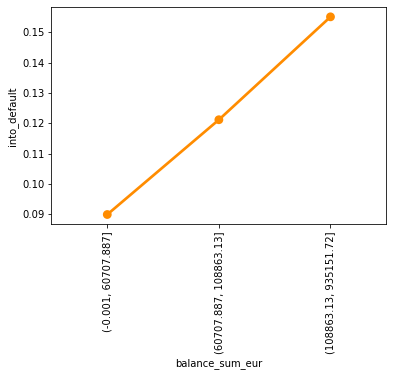

0    0.345780
1    0.320871
2    0.333350
Name: into_default, dtype: float64


<ipython-input-37-c78c9fd45485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[i] =pd.qcut(X_train[i], q=3)


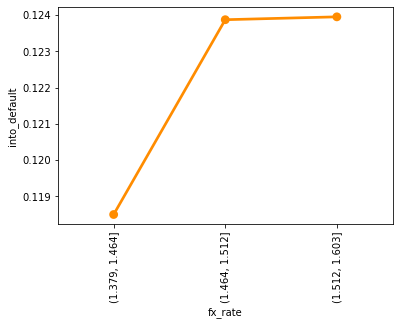

0    0.333350
1    0.333301
2    0.333350
Name: into_default, dtype: float64


<ipython-input-37-c78c9fd45485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[i] =pd.qcut(X_train[i], q=3)


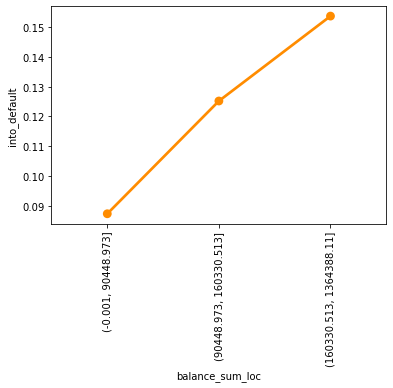

In [37]:
newdf=X_train.select_dtypes(exclude=['object'])
for i in list(newdf.loc[:, ['balance_sum_eur','fx_rate','balance_sum_loc']].columns):
    plt.figure()
    newdf[i] =pd.qcut(X_train[i], q=3)
    plot = newdf.groupby(i, as_index=False)['into_default'].mean()
    sns.pointplot(x=i,y='into_default',data=plot,color='darkorange')
    plt.xticks(rotation=90)
    print(newdf.groupby(i, as_index=False)['into_default'].count().iloc[:,1]/len(newdf))
    plt.show()

In [38]:
x = pd.crosstab(X_train['loan_purpose'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'loan_purpose'] == x['woe'].index[0]:
        X_train.loc[i,'loan_purpose_woe'] = x['woe'][0]
    elif X_train.loc[i,'loan_purpose'] == x['woe'].index[1]:
        X_train.loc[i,'loan_purpose_woe'] = x['woe'][1]
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720


In [39]:
x = pd.crosstab(X_train['Class_Chan_Ref_LoDoc'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Chan_Ref_LoDoc'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Chan_Ref_LoDoc_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Chan_Ref_LoDoc'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Chan_Ref_LoDoc_woe'] = x['woe'][1]
    elif X_train.loc[i,'Class_Chan_Ref_LoDoc'] == x['woe'].index[2]:
        X_train.loc[i,'Class_Chan_Ref_LoDoc_woe'] = x['woe'][2]
        
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910


In [40]:
x = pd.crosstab(X_train['Class_DTI'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_DTI'] == x['woe'].index[0]:
        X_train.loc[i,'Class_DTI_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_DTI'] == x['woe'].index[1]:
        X_train.loc[i,'Class_DTI_woe'] = x['woe'][1]
    elif X_train.loc[i,'Class_DTI'] == x['woe'].index[2]:
        X_train.loc[i,'Class_DTI_woe'] = x['woe'][2]
        
X_train.head()


,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042,0.088973
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910,-0.487678
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042,-0.487678
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042,-0.487678
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910,0.088973


In [41]:
x = pd.crosstab(X_train['Class_Initial_LTV'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Initial_LTV'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Initial_LTV_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Initial_LTV'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Initial_LTV_woe'] = x['woe'][1]
    elif X_train.loc[i,'Class_Initial_LTV'] == x['woe'].index[2]:
        X_train.loc[i,'Class_Initial_LTV_woe'] = x['woe'][2]
    elif X_train.loc[i,'Class_Initial_LTV'] == x['woe'].index[3]:
        X_train.loc[i,'Class_Initial_LTV_woe'] = x['woe'][3]
        
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042,0.088973,0.389473
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910,-0.487678,-0.674418
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042,-0.487678,-0.674418
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042,-0.487678,-0.674418
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910,0.088973,0.389473


In [42]:
x = pd.crosstab(X_train['Class_Pay_Ahead'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Pay_Ahead'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Pay_Ahead_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Pay_Ahead'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Pay_Ahead_woe'] = x['woe'][1]
        
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042,0.088973,0.389473,0.544692
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910,-0.487678,-0.674418,-1.197246
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042,-0.487678,-0.674418,-1.197246
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042,-0.487678,-0.674418,0.544692
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910,0.088973,0.389473,-1.197246


In [43]:
x = pd.crosstab(X_train['Class_Pay_Hist'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Pay_Hist'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Pay_Hist_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Pay_Hist'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Pay_Hist_woe'] = x['woe'][1]
    elif X_train.loc[i,'Class_Pay_Hist'] == x['woe'].index[2]:
        X_train.loc[i,'Class_Pay_Hist_woe'] = x['woe'][2]
    elif X_train.loc[i,'Class_Pay_Hist'] == x['woe'].index[3]:
        X_train.loc[i,'Class_Pay_Hist_woe'] = x['woe'][3]
        
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739


In [44]:
x = pd.crosstab(X_train['Class_Pay_Status'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Pay_Status'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Pay_Status_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Pay_Status'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Pay_Status_woe'] = x['woe'][1]
        
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562


In [45]:
x = pd.crosstab(X_train['Class_Redraw_Change'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Redraw_Change'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Redraw_Change_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Redraw_Change'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Redraw_Change_woe'] = x['woe'][1]
        
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364


In [46]:
x = pd.crosstab(X_train['Class_Repay_Stat'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Repay_Stat'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Repay_Stat_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Repay_Stat'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Repay_Stat_woe'] = x['woe'][1]
        
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe,Class_Repay_Stat_woe
0,441,0,IN,80517.57,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,116732.76,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364,-0.145092
1,22867,0,IN,26791.85,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,40383.62,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364,-0.145092
2,25259,0,OO,162105.67,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,248370.21,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364,0.179294
3,16562,0,IN,68851.84,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,97927.28,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364,-0.145092
4,5622,0,OO,45163.97,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,70853.69,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364,0.179294


In [47]:
X_train['balance_sum_eur'] = np.where((X_train['balance_sum_eur'] < 60707),'A',\
        np.where((X_train['balance_sum_eur'] > 60707) & (X_train['balance_sum_eur'] < 108863), 'B', 'C'))
X_train['balance_sum_loc'] = np.where((X_train['balance_sum_loc'] < 90448),'A',\
        np.where((X_train['balance_sum_loc'] > 90448) & (X_train['balance_sum_loc'] < 160330), 'B', 'C'))
                                            

In [48]:
x = pd.crosstab(X_train['balance_sum_eur'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'balance_sum_eur'] == x['woe'].index[0]:
        X_train.loc[i,'balance_sum_eur_woe'] = x['woe'][0]
    elif X_train.loc[i,'balance_sum_eur'] == x['woe'].index[1]:
        X_train.loc[i,'balance_sum_eur_woe'] = x['woe'][1]
    elif X_train.loc[i,'balance_sum_eur'] == x['woe'].index[2]:
        X_train.loc[i,'balance_sum_eur_woe'] = x['woe'][2]
        
X_train.head()


,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe,Class_Repay_Stat_woe,balance_sum_eur_woe
0,441,0,IN,B,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,B,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364,-0.145092,-0.005905
1,22867,0,IN,A,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,A,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364,-0.145092,-0.344512
2,25259,0,OO,C,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,C,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364,0.179294,0.277533
3,16562,0,IN,B,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,B,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364,-0.145092,-0.005905
4,5622,0,OO,A,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,A,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364,0.179294,-0.344512


In [49]:
x = pd.crosstab(X_train['balance_sum_loc'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'balance_sum_loc'] == x['woe'].index[0]:
        X_train.loc[i,'balance_sum_loc_woe'] = x['woe'][0]
    elif X_train.loc[i,'balance_sum_loc'] == x['woe'].index[1]:
        X_train.loc[i,'balance_sum_loc_woe'] = x['woe'][1]
    elif X_train.loc[i,'balance_sum_loc'] == x['woe'].index[2]:
        X_train.loc[i,'balance_sum_loc_woe'] = x['woe'][2]
        
X_train.head()


,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe,Class_Repay_Stat_woe,balance_sum_eur_woe,balance_sum_loc_woe
0,441,0,IN,B,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,B,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364,-0.145092,-0.005905,0.028690
1,22867,0,IN,A,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,A,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364,-0.145092,-0.344512,-0.372566
2,25259,0,OO,C,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,C,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364,0.179294,0.277533,0.266413
3,16562,0,IN,B,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,B,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364,-0.145092,-0.005905,0.028690
4,5622,0,OO,A,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,A,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364,0.179294,-0.344512,-0.372566


In [63]:
newdf = X_train
newdf['default'] = X_train.into_default
newdf=newdf.iloc[:, -12:]
newdf.head()

,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe,Class_Repay_Stat_woe,balance_sum_eur_woe,balance_sum_loc_woe,default
0,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364,-0.145092,-0.005905,0.028690,0
1,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364,-0.145092,-0.344512,-0.372566,0
2,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364,0.179294,0.277533,0.266413,0
3,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364,-0.145092,-0.005905,0.028690,0
4,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364,0.179294,-0.344512,-0.372566,0


0    0.495136
1    0.504864
Name: default, dtype: float64


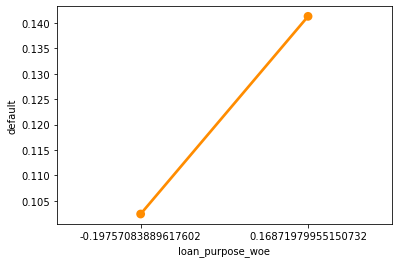

0    0.27459
1    0.49941
2    0.22600
Name: default, dtype: float64


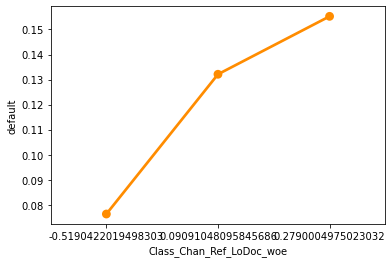

0    0.373588
1    0.397072
2    0.229341
Name: default, dtype: float64


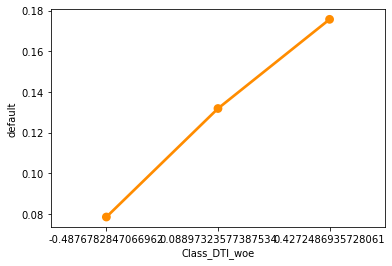

0    0.239216
1    0.323327
2    0.241525
3    0.195932
Name: default, dtype: float64


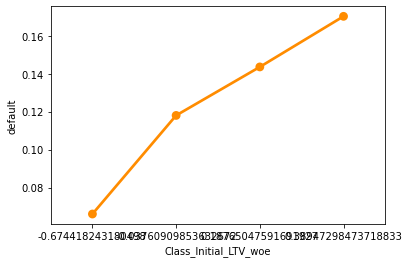

0    0.465805
1    0.534195
Name: default, dtype: float64


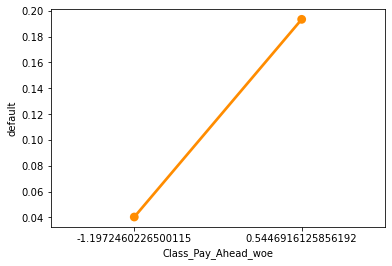

0    0.248944
1    0.293849
2    0.286823
3    0.170384
Name: default, dtype: float64


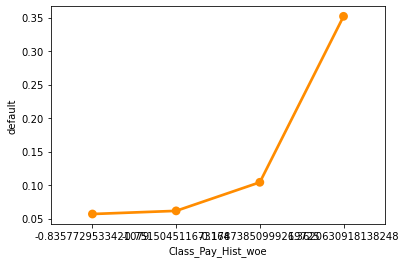

0    0.583522
1    0.416478
Name: default, dtype: float64


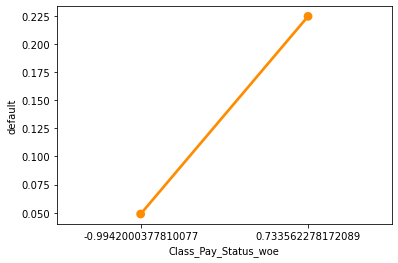

0    0.578068
1    0.421932
Name: default, dtype: float64


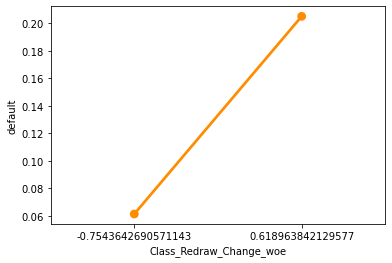

0    0.582736
1    0.417264
Name: default, dtype: float64


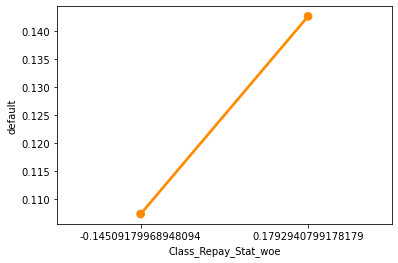

0    0.333153
1    0.333448
2    0.333399
Name: default, dtype: float64


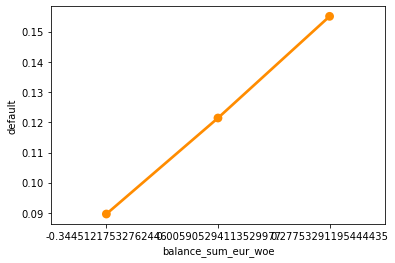

0    0.333350
1    0.333301
2    0.333350
Name: default, dtype: float64


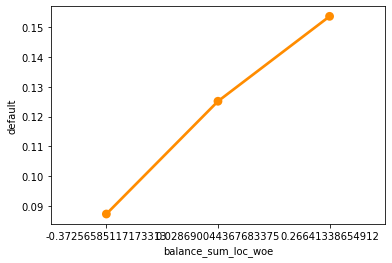

In [64]:
for i in list(newdf.iloc[:, 0:-1].columns):
    plt.figure()
    plot = newdf.groupby(i, as_index=False)['default'].mean()
    sns.pointplot(x=i,y='default',data=plot,color='darkorange')
    print(newdf.groupby(i, as_index=False)['default'].count().iloc[:,1]/len(newdf))
    plt.show()

# Exercise 4

Using the same table as in the previous exercises, perform the multivariate analysis of all the variables that pass the previous univariate and bivariate analysis, obtaining correlation matrix for all the variables.

Hint : heatmap

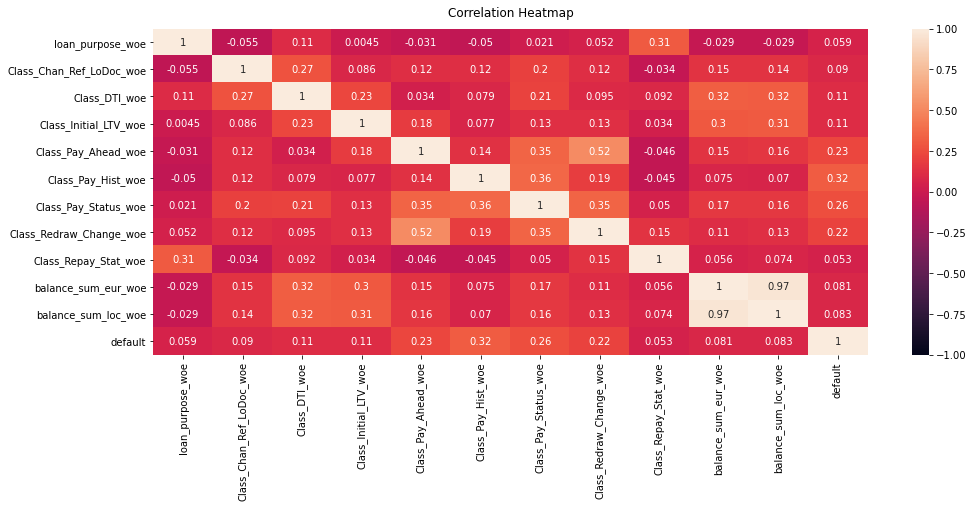

In [389]:
X_train['default'] = X_train.into_default

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_train.iloc[:, -13:].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Exercise 5
Using the same table (model development) as in the previous exercises, generate different alternatives of models, including the following:
- ROC value
- P value
- Beta 
- Standard error
- AUC

Hint : OLS, roc_auc_score

In [65]:

df2 = pd.DataFrame()
for i in range(1,len(newdf.columns)-1):
     #define response variable
    y = newdf['default']
    
    #define explanatory variable
    x = newdf.iloc[:,i]
    
    #fit linear regression model
    model = sm.OLS(y, x).fit()
    
    #name
    df2.loc[i,'name'] =model.summary2().tables[1].index[0]
    
    #coef
    df2.loc[i,'coeff'] = round(model.summary2().tables[1].iloc[0,0],6)
    
    #std err
    df2.loc[i,'std_err'] = round(model.summary2().tables[1].iloc[0,1],6)
    
    #p value
    df2.loc[i,'p_value'] = round(model.summary2().tables[1].iloc[0,3],2)
    
    #auc value
    df2.loc[i,'auc'] = round(roc_auc_score(y, model.predict(newdf.iloc[:,i])),2)
df2


,name,coeff,std_err,p_value,auc
1,Class_Chan_Ref_LoDoc_woe,0.051170,0.007908,0.0,0.57
2,Class_DTI_woe,0.056361,0.006681,0.0,0.59
3,Class_Initial_LTV_woe,0.050150,0.006366,0.0,0.59
4,Class_Pay_Ahead_woe,0.040889,0.002679,0.0,0.68
5,Class_Pay_Hist_woe,0.076512,0.002954,0.0,0.72
6,Class_Pay_Status_woe,0.050201,0.002714,0.0,0.70
7,Class_Redraw_Change_woe,0.054674,0.003475,0.0,0.66
8,Class_Repay_Stat_woe,0.062029,0.015274,0.0,0.54
9,balance_sum_eur_woe,0.058471,0.009579,0.0,0.57
10,balance_sum_loc_woe,0.056705,0.009233,0.0,0.57


In [157]:
newdf = X_train
newdf['default'] = X_train.into_default
newdf=newdf.iloc[:, -12:]
newdf.head()

,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe,Class_Repay_Stat_woe,balance_sum_eur_woe,balance_sum_loc_woe,default
0,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364,-0.145092,-0.005905,0.028690,0
1,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364,-0.145092,-0.344512,-0.372566,0
2,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364,0.179294,0.277533,0.266413,0
3,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364,-0.145092,-0.005905,0.028690,0
4,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364,0.179294,-0.344512,-0.372566,0


In [158]:
import statsmodels.formula.api as smf
pd_model = log_reg = smf.logit("default ~ Class_Pay_Hist_woe + Class_Pay_Status_woe + Class_Pay_Ahead_woe", data=newdf).fit()
print(pd_model.summary())

Optimization terminated successfully.
         Current function value: 0.300803
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                20354
Model:                          Logit   Df Residuals:                    20350
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.1891
Time:                        00:03:37   Log-Likelihood:                -6122.5
converged:                       True   LL-Null:                       -7550.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.9667      0.025    -77.757      0.000      -2.016      -1.917

In [168]:
X_train['pd_value']= pd_model.predict(X_train)

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y, pd_value>0.5))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17870
           1       0.00      0.00      0.00      2484

    accuracy                           0.88     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.77      0.88      0.82     20354



/Users/imuraterc/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


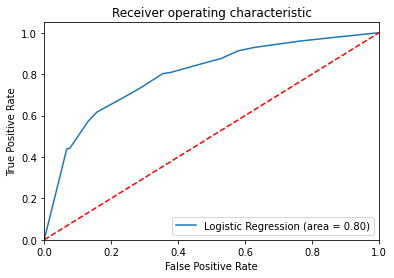

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(X_train.default, pd_model.predict(X_train))
fpr, tpr, thresholds = roc_curve(X_train.default, pd_model.predict(X_train))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Exercise 6
With the final model created in exercise 5, build a PD, do the PD calibration, considering the following:

- 7-9 risk buckets
- Concentration for each grade less than 30%
- Calculate the PD PiT (12 months)
- Calculate the central tendency 
- Finally, calculate the PD TTC adjusted via Bayes with the central tendency obtained before. 


In [169]:
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe,Class_Repay_Stat_woe,balance_sum_eur_woe,balance_sum_loc_woe,default,pd_value
0,441,0,IN,B,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,B,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364,-0.145092,-0.005905,0.028690,0,0.147209
1,22867,0,IN,A,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,A,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364,-0.145092,-0.344512,-0.372566,0,0.018027
2,25259,0,OO,C,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,C,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364,0.179294,0.277533,0.266413,0,0.029230
3,16562,0,IN,B,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,B,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364,-0.145092,-0.005905,0.028690,0,0.101988
4,5622,0,OO,A,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,A,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364,0.179294,-0.344512,-0.372566,0,0.065810


In [170]:
X_train['bucket'] = pd.qcut(pd_value,8)
X_train.head()

,index,into_default,loan_purpose,balance_sum_eur,fx_rate,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,balance_sum_loc,loan_purpose_woe,Class_Chan_Ref_LoDoc_woe,Class_DTI_woe,Class_Initial_LTV_woe,Class_Pay_Ahead_woe,Class_Pay_Hist_woe,Class_Pay_Status_woe,Class_Redraw_Change_woe,Class_Repay_Stat_woe,balance_sum_eur_woe,balance_sum_loc_woe,default,pd_value,bucket
0,441,0,IN,B,1.44978,DE,CDE,E,ABCDEFGH,B,ACDE,E,ABCD,B,-0.197571,-0.519042,0.088973,0.389473,0.544692,-0.751505,0.733562,-0.754364,-0.145092,-0.005905,0.028690,0,0.147209,"(0.102, 0.147]"
1,22867,0,IN,A,1.50731,C,AB,AB,IJKLM,A,B,E,ABCD,A,-0.197571,0.090910,-0.487678,-0.674418,-1.197246,-0.835773,-0.994200,-0.754364,-0.145092,-0.344512,-0.372566,0,0.018027,"(0.016999999999999998, 0.0192]"
2,25259,0,OO,C,1.53215,DE,AB,AB,IJKLM,C,B,E,EF,C,0.168720,-0.519042,-0.487678,-0.674418,-1.197246,-0.178739,-0.994200,-0.754364,0.179294,0.277533,0.266413,0,0.029230,"(0.0192, 0.0292]"
3,16562,0,IN,B,1.42229,DE,AB,AB,ABCDEFGH,C,B,E,ABCD,B,-0.197571,-0.519042,-0.487678,-0.674418,0.544692,-0.178739,-0.994200,-0.754364,-0.145092,-0.005905,0.028690,0,0.101988,"(0.0687, 0.102]"
4,5622,0,OO,A,1.56881,C,CDE,E,IJKLM,C,ACDE,E,EF,A,0.168720,0.090910,0.088973,0.389473,-1.197246,-0.178739,0.733562,-0.754364,0.179294,-0.344512,-0.372566,0,0.065810,"(0.0438, 0.0687]"


In [173]:
X_train['bucket'].value_counts() / len(final_pd) < 0.3

(0.016999999999999998, 0.0192]    True
(0.0438, 0.0687]                  True
(0.102, 0.147]                    True
(0.0192, 0.0292]                  True
(0.21, 0.459]                     True
(0.147, 0.21]                     True
(0.0687, 0.102]                   True
(0.0292, 0.0438]                  True
Name: bucket, dtype: bool

In [184]:
df.head()

,CIF_Combo,into_default,snapshot_date,loan_purpose,balance_sum_eur,fx_rate,PD,EAD,Rating,Score,Class_Chan_Ref_LoDoc,Class_DTI,Class_Initial_LTV,Class_Pay_Ahead,Class_Pay_Hist,Class_Pay_Status,Class_Redraw_Change,Class_Repay_Stat,snapshot_year,balance_sum_loc
0,533049,0,31Jan2015,IN,126808.10,1.44978,0.001481,189882.30,MA07,658.0,C,A,C,I,A,B,E,F,2015,183843.84
1,462039,0,31Jan2015,IN,49018.61,1.44978,0.000408,65430.10,MA03,697.0,E,A,C,M,C,B,E,D,2015,71066.20
2,462039,0,31Jan2015,IN,49018.61,1.44978,0.000408,62241.04,MA03,697.0,E,A,C,M,C,B,E,D,2015,71066.20
3,586413,0,31Jan2015,IN,124770.18,1.44978,0.001481,42193.15,MA07,656.0,E,A,C,G,A,B,E,A,2015,180889.31
4,586413,0,31Jan2015,IN,124770.18,1.44978,0.001481,142697.42,MA07,656.0,E,A,C,G,A,B,E,A,2015,180889.31


In [191]:
right_df = pd.DataFrame()
right_df['index'] = df.index
right_df['snapshot_date'] = df.snapshot_date
X_train = X_train.merge(right_df, on='index', how='left')


In [211]:
df_PD = X_train.groupby('bucket', as_index=False)['default'].sum().merge(X_train.groupby('bucket', as_index=False)['default'].count(), on='bucket', how='left')
df_PD = df_PD.rename(columns={"default_x": "sum_default", "default_y": "count_default"})
df_PD['PiT_PD'] = df_PD.sum_default / df_PiT_PD.count_default
df_PD


,bucket,sum_default,count_default,PiT_PD
0,"(0.016999999999999998, 0.0192]",101,4349,0.023224
1,"(0.0192, 0.0292]",76,2492,0.030498
2,"(0.0292, 0.0438]",41,901,0.045505
3,"(0.0438, 0.0687]",259,3866,0.066994
4,"(0.0687, 0.102]",179,1736,0.103111
5,"(0.102, 0.147]",297,2670,0.111236
6,"(0.147, 0.21]",433,1873,0.231180
7,"(0.21, 0.459]",1098,2467,0.445075


In [207]:
#CT
CT = X_train.groupby('snapshot_date', as_index=False)['default'].mean().default.mean()
print(CT)

0.12276169937234317


In [213]:
df_PD['LRA_PD'] = (CT*(df_PD.sum_default/df_PD.sum_default.sum())) \
/(CT*(df_PD.sum_default/df_PD.sum_default.sum()) \
  +(1-CT)*(df_PD.count_default/df_PD.count_default.sum()))

df_PD


,bucket,sum_default,count_default,PiT_PD,LRA_PD
0,"(0.016999999999999998, 0.0192]",101,4349,0.023224,0.025939
1,"(0.0192, 0.0292]",76,2492,0.030498,0.033789
2,"(0.0292, 0.0438]",41,901,0.045505,0.049592
3,"(0.0438, 0.0687]",259,3866,0.066994,0.071341
4,"(0.0687, 0.102]",179,1736,0.103111,0.105734
5,"(0.102, 0.147]",297,2670,0.111236,0.113123
6,"(0.147, 0.21]",433,1873,0.231180,0.209543
7,"(0.21, 0.459]",1098,2467,0.445075,0.337906


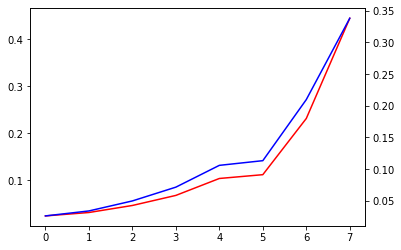

In [233]:
sns.lineplot(data=df_PD.PiT_PD, color="r")
ax2 = plt.twinx()
sns.lineplot(data=df_PD.LRA_PD, color="b", ax=ax2)


## Great Job!